In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/dataset_file.csv")
data.head(10)

data['fweatherdate'] = pd.to_datetime(data['fweatherdate'])
data['fcasedate'] = pd.to_datetime(data['fcasedate'])
data['fvaccinationdate'] = pd.to_datetime(data['fvaccinationdate'])

data.head(10)

,fweatherid,fweatherdate,temperature,fcaseprovinceid,fcasedate,fvaccinationdate,fvaccinationprovinceid,proportionfullyvaccinated,ratechangecases
0,8401300,2020-12-01,1.5,10,2020-12-19,2020-12-19,10,0.0,69.8225
1,8401298,2020-12-01,1.0,10,2020-12-19,2020-12-19,10,0.0,69.8225
2,8401295,2020-12-01,5.7,10,2020-12-19,2020-12-19,10,0.0,69.8225
3,8400812,2020-12-01,-0.2,10,2020-12-19,2020-12-19,10,0.0,69.8225
4,8400601,2020-12-01,2.0,10,2020-12-19,2020-12-19,10,0.0,69.8225
5,8401300,2020-12-01,1.5,10,2020-12-26,2020-12-19,10,0.0,69.8225
6,8401298,2020-12-01,1.0,10,2020-12-26,2020-12-19,10,0.0,69.8225
7,8401295,2020-12-01,5.7,10,2020-12-26,2020-12-19,10,0.0,69.8225
8,8400812,2020-12-01,-0.2,10,2020-12-26,2020-12-19,10,0.0,69.8225
9,8400601,2020-12-01,2.0,10,2020-12-26,2020-12-19,10,0.0,69.8225


In [11]:
grouped = data.groupby(["fweatherid","fweatherdate"])[["temperature","proportionfullyvaccinated", "ratechangecases"]].mean()
grouped.head(20)
grouped.to_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/grouped.csv")

In [74]:
# Read grouped data
data = pd.read_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/grouped.csv")
data['date'] = pd.to_datetime(data['date'])
# Encode nominal variable date (contains 26 distinct values)
data['date'] = data['date'].apply(lambda x: x.toordinal())
data.head(20)

,weatherid,date,temperature,proportionfullyvaccinated,ratechangecases
0,1011500,737760,5.6,0.00000,817.2750
1,1011500,737791,5.3,0.06000,1136.3500
2,1011500,737822,4.1,0.82500,1408.0450
3,1011500,737850,7.2,1.70000,1687.3800
4,1011500,737881,10.9,1.70000,2145.9500
5,1011500,737911,13.4,2.52000,2592.6940
6,1011500,737942,19.3,15.10000,2754.1500
7,1011500,737972,21.3,46.48000,2794.2800
8,1011500,738003,20.2,65.32500,2969.5674
9,1011500,738034,15.6,69.92500,3313.2950


In [67]:
!pip install category_encoders
import category_encoders as ce

4865.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 5.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 6.0 MB/s eta 0:00:0000:0100:01


In [75]:
encoder = ce.OneHotEncoder(cols=['weatherid']) 

encoder

data = encoder.fit_transform(data)
data.head()

,weatherid_1,weatherid_2,weatherid_3,weatherid_4,weatherid_5,weatherid_6,weatherid_7,weatherid_8,weatherid_9,weatherid_10,...,weatherid_60,weatherid_61,weatherid_62,weatherid_63,weatherid_64,weatherid_65,date,temperature,proportionfullyvaccinated,ratechangecases
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737760,5.6,0.000,817.275
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737791,5.3,0.060,1136.350
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737822,4.1,0.825,1408.045
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737850,7.2,1.700,1687.380
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737881,10.9,1.700,2145.950


In [80]:
predictors = data.loc[:, data.columns.drop('ratechangecases')]
predictors.head(20)
X = predictors.values
Y = data['ratechangecases'].values

In [39]:
!pip install scikit-learn

3912.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10)

In [82]:
X_train

array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  7.384600e+05,
         5.600000e+00,  8.540000e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  7.384900e+05,
        -3.900000e+00,  8.106000e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  7.377600e+05,
        -8.100000e+00,  0.000000e+00],
       ...,
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  7.381560e+05,
        -1.770000e+01,  7.450000e+01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  7.377910e+05,
        -2.540000e+01,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  7.382460e+05,
        -1.600000e+00,  7.986667e+01]])

In [83]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:
y_pred = regressor.predict(X_test)

In [85]:
type(y_pred)

numpy.ndarray

In [87]:
results = pd.DataFrame()
results['true-value'] = y_test
results['prediction'] = y_pred
results.head(30)

,true-value,prediction
0,21671.8500,21671.8500
1,51.2625,139.0350
2,8020.6560,8020.6560
3,32829.9300,32829.9300
4,3967.6050,3967.6050
5,25848.6820,25848.6820
6,8712.9300,8712.9300
7,61.6360,61.6360
8,295.8625,295.8625
9,9994.5270,9994.5270


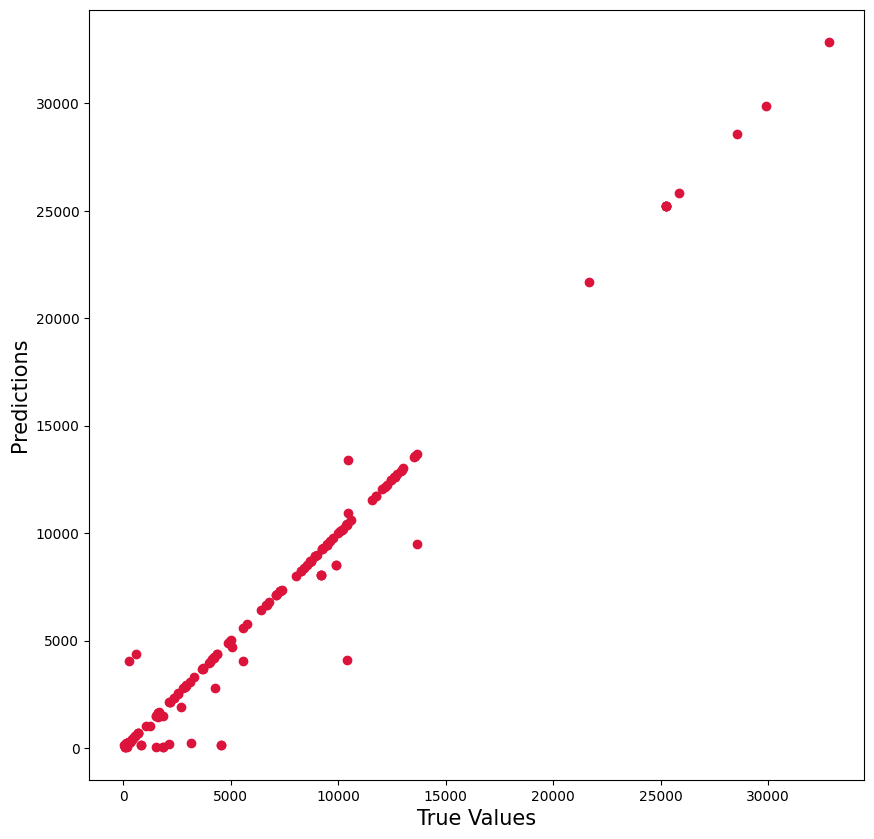

In [90]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.xlabel('True-Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()